In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:00<00:00, 163MB/s]
100% 163M/163M [00:00<00:00, 172MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [13]:
with_mask = os.listdir('/content/data/with_mask/')
len(with_mask)

3725

In [14]:
without_mask = os.listdir('/content/data/without_mask/')
len(without_mask)

3828

In [15]:
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_515.jpg', 'with_mask_1432.jpg', 'with_mask_3104.jpg', 'with_mask_656.jpg', 'with_mask_1094.jpg']
['with_mask_1788.jpg', 'with_mask_2404.jpg', 'with_mask_2894.jpg', 'with_mask_3438.jpg', 'with_mask_339.jpg']


In [16]:
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_2793.jpg', 'without_mask_1590.jpg', 'without_mask_2430.jpg', 'without_mask_1606.jpg', 'without_mask_874.jpg']
['without_mask_2215.jpg', 'without_mask_2052.jpg', 'without_mask_213.jpg', 'without_mask_3009.jpg', 'without_mask_456.jpg']


**Label encoing**

with_mask : 1

without_mask : 0

In [20]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [22]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [23]:
labels =  with_mask_label + without_mask_label
print(len(labels))

7553


In [41]:
type(labels)

list

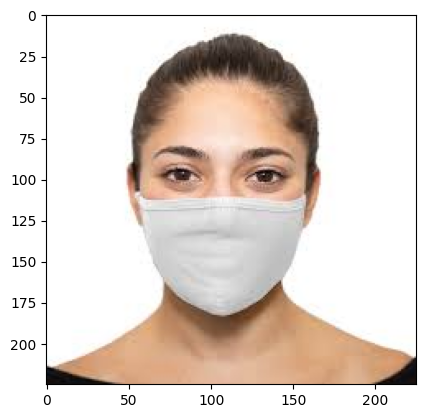

In [30]:
img = mpimg.imread('/content/data/with_mask/with_mask_2404.jpg')
imgplot = plt.imshow(img)
plt.show()

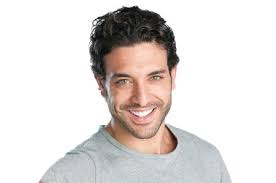

In [31]:
img = cv2.imread('/content/data/without_mask/without_mask_1000.jpg')
cv2_imshow(img)

**Image Resizing and converting to numpy array**

In [36]:
path = '/content/data/with_mask/'

data = []

for img in with_mask:
  image = Image.open( path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


path = '/content/data/without_mask/'

for img in without_mask:
  image = Image.open( path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)





In [37]:
type(data)

list

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(128, 128, 3)

In [40]:
len(data)

7553

In [42]:
X = np.array(data)
Y = np.array(labels)

In [43]:
print(X.shape)

(7553, 128, 128, 3)


In [44]:
print(Y.shape)

(7553,)


**Train Test Split**

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [54]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**Scaling the data**

In [55]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building Convolutional Neural Network**

In [48]:
import tensorflow as tf
from tensorflow import keras

In [51]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (128,128,3) ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [61]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=4)

Epoch 1/4
170/170 ━━━━━━━━━━━━━━━━━━━━ 167s 984ms/step - acc: 0.9415 - loss: 0.1442 - val_acc: 0.9273 - val_loss: 0.1638
Epoch 2/4
170/170 ━━━━━━━━━━━━━━━━━━━━ 173s 814ms/step - acc: 0.9562 - loss: 0.1198 - val_acc: 0.9504 - val_loss: 0.1600
Epoch 3/4
170/170 ━━━━━━━━━━━━━━━━━━━━ 152s 893ms/step - acc: 0.9604 - loss: 0.1013 - val_acc: 0.9471 - val_loss: 0.1534
Epoch 4/4
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 797ms/step - acc: 0.9697 - loss: 0.0783 - val_acc: 0.9438 - val_loss: 0.1329


In [62]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy',accuracy*100)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - acc: 0.9358 - loss: 0.2228
Test Accuracy 94.24222111701965


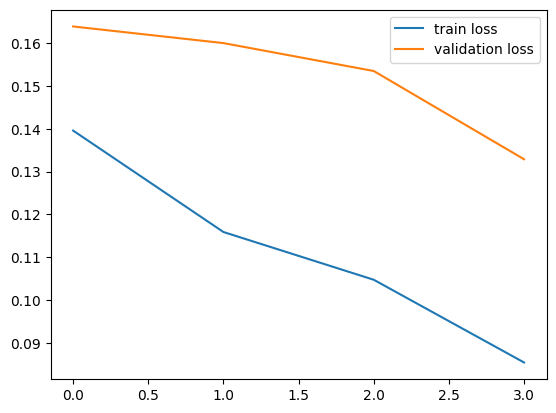

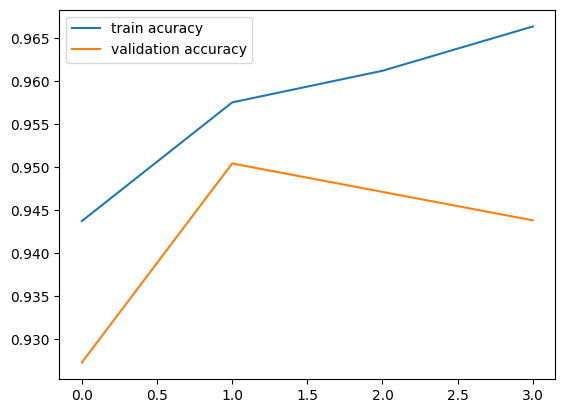

In [63]:
h = history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train acuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted:/content/data/with_mask/with_mask_5.jpg


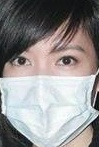

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.32876793 0.5670062 ]]
1
The person in the image is wearing mask


In [78]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')
